In [1]:
import pandas as pd

In [2]:
og_df = pd.read_pickle('og_df.pkl') 

In [58]:
count_df1 = og_df.groupby(['transcript_id', 'transcript_position']).size().reset_index(name='read_count')
count_df2 = og_df.groupby(['transcript_id']).size().reset_index(name='expression_count') #most genes are likely to produce unique transcripts
df = og_df.merge(count_df1, on=['transcript_id', 'transcript_position'])
df = df.merge(count_df2, on=['transcript_id'])

In [97]:
agg_functions = {
    'gene_id': 'first',
    'combined nucleotides': 'first',
    'dwelling_time1': 'mean',
    'sd1': 'mean',
    'mean1': 'mean',
    'dwelling_time2': 'mean',
    'sd2': 'mean',
    'mean2': 'mean',
    'dwelling_time3': 'mean',
    'sd3': 'mean',
    'mean3': 'mean',
    'label': 'sum'
}

summary_df = og_df.groupby(['transcript_id', 'transcript_position']).agg(agg_functions).reset_index()

summary_df = summary_df.merge(count_df1, on=['transcript_id', 'transcript_position'])
summary_df = summary_df.merge(count_df2, on=['transcript_id'])

summary_df['label_percentage'] = summary_df['label'] / summary_df['read_count'] * 100
summary_df = summary_df.rename(columns={'label': 'label_sum'})
summary_df['label'] = summary_df['label_percentage'].apply(lambda x: 0 if x == 0 else 1)

In [60]:
agg_functions = {
    'gene_id': 'first',
    'combined nucleotides': 'first',
    'dwelling_time1': 'mean',
    'sd1': 'mean',
    'mean1': 'mean',
    'dwelling_time2': 'mean',
    'sd2': 'mean',
    'mean2': 'mean',
    'dwelling_time3': 'mean',
    'sd3': 'mean',
    'mean3': 'mean',
    'label': 'first'
}

summary_df1 = og_df.groupby(['transcript_id', 'transcript_position']).agg(agg_functions).reset_index()
summary_df1['label'].equals(summary_df['label'])

True

In [61]:
summary_df['label_percentage'].unique()

array([  0., 100.])

In [ ]:
summary_df = summary_df.drop(columns=['label_percentage', 'label_sum'])
summary_df

In [63]:
df

,transcript_id,transcript_position,combined nucleotides,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,gene_id,label,read_count,expression_count
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,185,3449
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,185,3449
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,185,3449
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,185,3449
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,185,3449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,TTGACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4,ENSG00000167747,0,52,1323
11027102,ENST00000641834,1693,TTGACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6,ENSG00000167747,0,52,1323
11027103,ENST00000641834,1693,TTGACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3,ENSG00000167747,0,52,1323
11027104,ENST00000641834,1693,TTGACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8,ENSG00000167747,0,52,1323


In [64]:
print(df['label'].value_counts())
print(summary_df['label'].value_counts())

label
0    10527532
1      499574
Name: count, dtype: int64
label
0    116363
1      5475
Name: count, dtype: int64


In [100]:
summary_df['5-mer'] = summary_df['combined nucleotides'].apply(lambda x: x[1:-1])
summary_df.groupby(['5-mer'])['label'].sum().sort_values(ascending=False)

5-mer
AAACA      38
AAACC      11
AAACT     255
AGACA     147
AGACC      60
AGACT     525
GAACA     187
GAACC     124
GAACT     783
GGACA     691
GGACC     552
GGACT    1440
TAACA       1
TAACC       2
TAACT      71
TGACA      68
TGACC      90
TGACT     430
Name: label, dtype: int64

In [66]:
df['5-mer'] = df['combined nucleotides'].apply(lambda x: x[1:-1])

In [67]:
df[['transcript_position', 'transcript_id', 'combined nucleotides', 'gene_id', 'label', '5-mer']] = df[['transcript_position', 'transcript_id', 'combined nucleotides', 'gene_id', 'label', '5-mer']].astype("category")
df.dtypes

transcript_id           category
transcript_position     category
combined nucleotides    category
dwelling_time1           float64
sd1                      float64
mean1                    float64
dwelling_time2           float64
sd2                      float64
mean2                    float64
dwelling_time3           float64
sd3                      float64
mean3                    float64
gene_id                 category
label                   category
read_count                 int64
expression_count           int64
5-mer                   category
dtype: object

In [68]:
summary_df[['transcript_position', 'transcript_id', 'combined nucleotides', 'gene_id', 'label', '5-mer']] = summary_df[['transcript_position', 'transcript_id', 'combined nucleotides', 'gene_id', 'label', '5-mer']].astype("category")
summary_df.dtypes

transcript_id           category
transcript_position     category
gene_id                 category
combined nucleotides    category
dwelling_time1           float64
sd1                      float64
mean1                    float64
dwelling_time2           float64
sd2                      float64
mean2                    float64
dwelling_time3           float64
sd3                      float64
mean3                    float64
read_count                 int64
expression_count           int64
label                   category
5-mer                   category
dtype: object

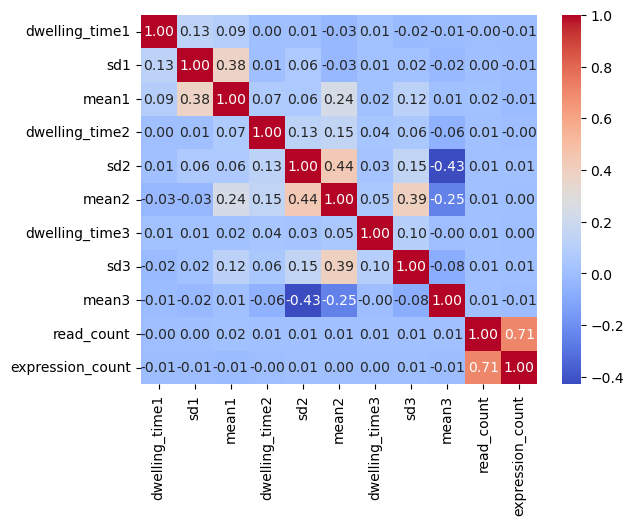

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [70]:
df = df.drop(columns=['combined nucleotides', 'gene_id'])
summary_df = summary_df.drop(columns=['combined nucleotides', 'gene_id'])

In [71]:
df.set_index(['transcript_id', 'transcript_position'], inplace=True)
summary_df.set_index(['transcript_id', 'transcript_position'], inplace=True)

In [72]:
df_encoded = pd.get_dummies(df, columns=['5-mer'], drop_first=False)
sdf_encoded = pd.get_dummies(summary_df, columns=['5-mer'], drop_first=False)

In [73]:
df_encoded.dtypes

dwelling_time1       float64
sd1                  float64
mean1                float64
dwelling_time2       float64
sd2                  float64
mean2                float64
dwelling_time3       float64
sd3                  float64
mean3                float64
label               category
read_count             int64
expression_count       int64
5-mer_AAACA             bool
5-mer_AAACC             bool
5-mer_AAACT             bool
5-mer_AGACA             bool
5-mer_AGACC             bool
5-mer_AGACT             bool
5-mer_GAACA             bool
5-mer_GAACC             bool
5-mer_GAACT             bool
5-mer_GGACA             bool
5-mer_GGACC             bool
5-mer_GGACT             bool
5-mer_TAACA             bool
5-mer_TAACC             bool
5-mer_TAACT             bool
5-mer_TGACA             bool
5-mer_TGACC             bool
5-mer_TGACT             bool
dtype: object

In [74]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from sklearn.model_selection import train_test_split

df_X = df_encoded.drop('label', axis=1)
df_y = df_encoded['label']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42, stratify=df_y)

rus = RandomUnderSampler(random_state=42)
X_resampled_hybrid, y_resampled_hybrid = rus.fit_resample(X_train, y_train)
df_hybrid = pd.concat([pd.DataFrame(X_resampled_hybrid, columns=X_train.columns), pd.Series(y_resampled_hybrid, name='label')], axis=1)

sdf_X = sdf_encoded.drop('label', axis=1)
sdf_y = sdf_encoded['label']
sX_train, sX_test, sy_train, sy_test = train_test_split(sdf_X, sdf_y, test_size=0.2, random_state=42, stratify=sdf_y)

rus1 = RandomUnderSampler(random_state=42)
sX_resampled_hybrid, sy_resampled_hybrid = rus1.fit_resample(sX_train, sy_train)
sdf_hybrid = pd.concat([pd.DataFrame(sX_resampled_hybrid, columns=sX_train.columns), pd.Series(sy_resampled_hybrid, name='label')], axis=1)

In [75]:
df_hybrid.index = df.index[rus.sample_indices_]
sdf_hybrid.index = df.index[rus1.sample_indices_]

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Xtrain = pd.DataFrame(scaler.fit_transform(X_resampled_hybrid),columns = X_resampled_hybrid.columns)
df_Xtest = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

scaler1 = MinMaxScaler()
sdf_Xtrain = pd.DataFrame(scaler1.fit_transform(sX_resampled_hybrid),columns = sX_resampled_hybrid.columns)
sdf_Xtest = pd.DataFrame(scaler1.transform(sX_test),columns = sX_test.columns)

In [79]:
df_ytrain = y_resampled_hybrid
sdf_ytrain = sy_resampled_hybrid
df_ytest = y_test
sdf_ytest = sy_test

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [92]:
param_grid = {
    'max_depth': [1,5,10],
    'max_features': ["sqrt","log2",None],
    'n_estimators': [10,100,500]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=289, bootstrap=True)

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(rf,  param_grid, scoring='roc_auc', cv=5)

In [93]:
# Fit the random search object to the data
grid_search.fit(sdf_Xtrain, sdf_ytrain)
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)
#choose large enough max_features=500

Best hyperparameters: {'max_depth': 10, 'max_features': None, 'n_estimators': 500}


ROC AUC 0.8873613121364499


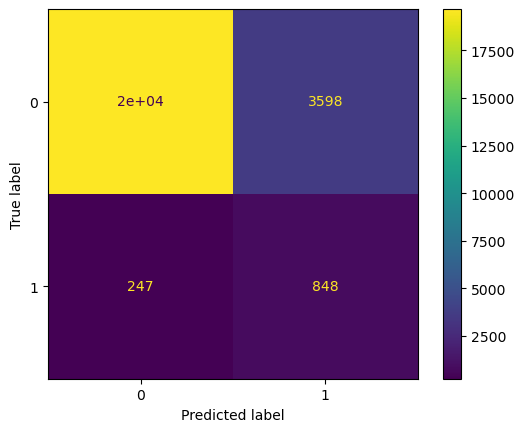

In [94]:
#Predict the response for test dataset
y_pred = best_estimator.predict(sdf_Xtest)

# Create the confusion matrix
cm = confusion_matrix(sdf_ytest, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print('ROC AUC', str(roc_auc_score(sdf_ytest, [pred[1] for pred in best_estimator.predict_proba(sdf_Xtest)])))

In [95]:
# Fit the random search object to the data
grid_search.fit(df_Xtrain, df_ytrain)
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)
#choose large enough max_features=500

KeyboardInterrupt: 

In [ ]:
#Predict the response for test dataset
y_pred = best_estimator.predict(df_Xtest)
df_Xtest['predicted_label'] = y_pred
predicted_label = df_Xtest.groupby(['transcript_id', 'transcript_position'])['predicted_label'].mean() * 100
actual_label = df_ytest.to_frame().groupby(['transcript_id', 'transcript_position'])['label'].first()

# Create the confusion matrix
cm = confusion_matrix(actual_label, predicted_label)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print('ROC AUC', str(roc_auc_score(actual_label, [pred[1] for pred in best_estimator.predict_proba(df_Xtest)])))